# Representación de uma imagen mayor profundidad de bits a varias binarias

In [34]:
!pip install opencv-python
!pip install matplotlib

In [35]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [36]:
james_webb_image = Image.open('nasa-james-webb.png')

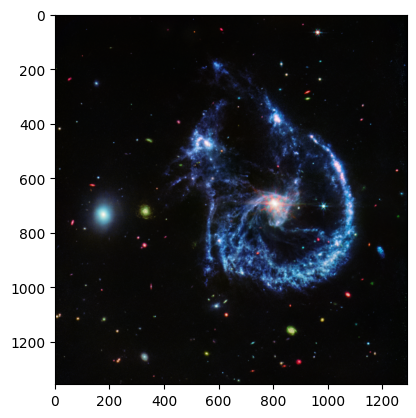

In [37]:
plt.imshow(james_webb_image)

(1291, 1356)


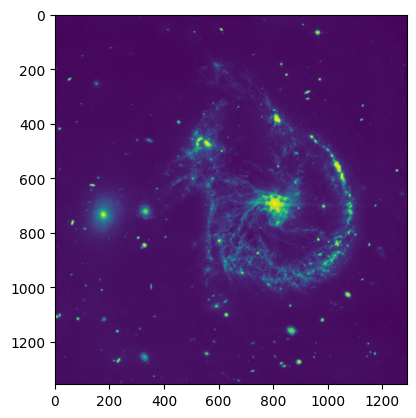

In [38]:
red_channel = james_webb_image.getchannel(0)
print(red_channel.size)
plt.imshow(red_channel)

In [39]:
def binaryconverter(num):
    residual = num % 2
    cocient = (num - residual) / 2
    color_res = 0
    
    if(residual != 0):
        color_res = 255

    return (cocient, color_res)

def binarydeconverter(bit, num_power):
    result = 0
    if bit == 255:
        result += 2**num_power

    return result

In [40]:
def make_binary_img(img):
    size = img.size
    layers = np.zeros((size[0], size[1], 8))

    for row in range(size[0]):
        for column in range(size[1]):
            intensity = img.getpixel([row, column])
            for layer in range(8):
                intensity, bit = binaryconverter(intensity)
                layers[row, column, layer] = bit

    return layers

def make_channel_img(binary_layers):
    size = binary_layers.shape[:2]
    res_img = np.zeros(size)

    for row in range(size[0]):
        for column in range(size[1]):
            intensity = 0
            for layer in range(8):
                intensity += binarydeconverter(binary_layers[row, column, layer], layer)
            res_img[row, column] = intensity

    return res_img
                

In [41]:
binary_webb = make_binary_img(red_channel)

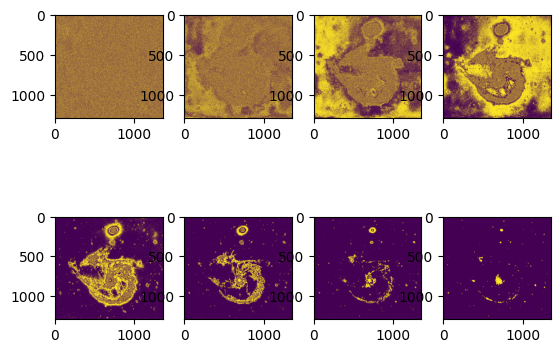

In [42]:
for l in range(8):
    plt.subplot(2, 4, l + 1)
    plt.imshow(binary_webb[:,:,l])

plt.show()

(910, 606)


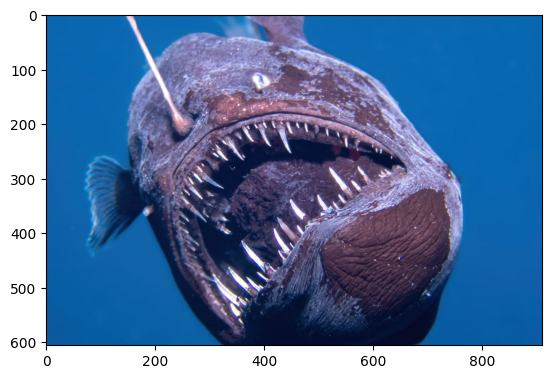

In [43]:
abyssal_fish = Image.open("fish.jpg")
print(abyssal_fish.size)
plt.imshow(abyssal_fish)

(910, 606)


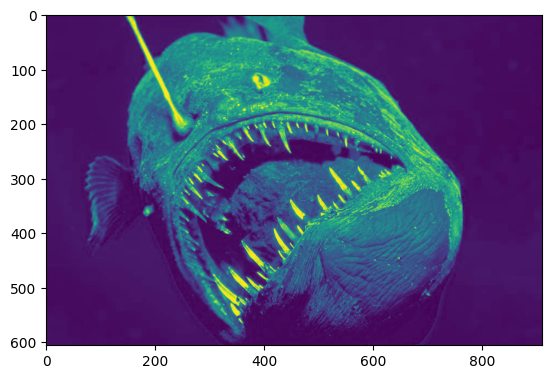

In [44]:
red_channel_fish = abyssal_fish.getchannel(0)
print(red_channel_fish.size)
plt.imshow(red_channel_fish)

In [45]:
binary_fish = make_binary_img(red_channel_fish)

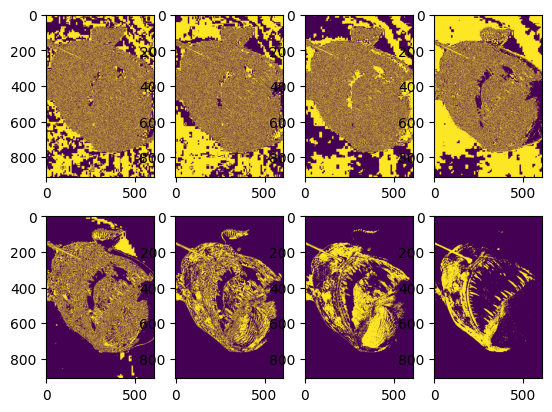

In [46]:
for l in range(8):
    plt.subplot(2, 4, l + 1)
    plt.imshow(binary_fish[:,:,l])

plt.show()

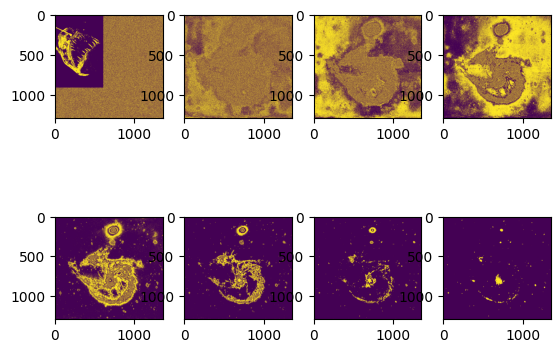

In [47]:
size_fish = abyssal_fish.size
for row in range(size_fish[0]):
    for column in range(size_fish[1]):
        binary_webb[row, column, 0] = binary_fish[row, column, 7]

for l in range(8):
    plt.subplot(2, 4, l + 1)
    plt.imshow(binary_webb[:,:,l])

plt.show()

In [48]:
rebuilt_image = make_channel_img(binary_webb)

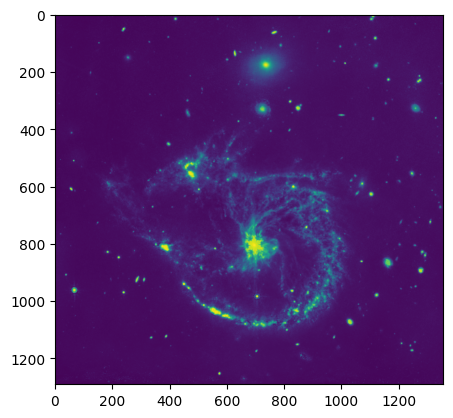

In [49]:
plt.imshow(rebuilt_image)

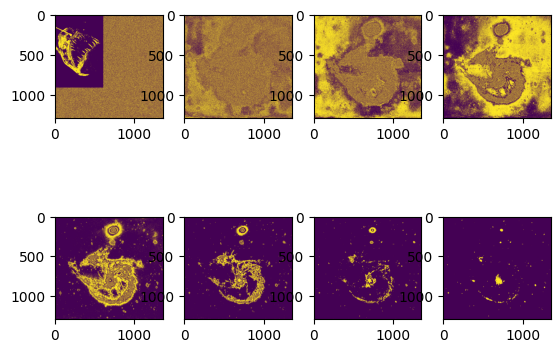

In [50]:
mixed_img = Image.open("james_and_abyssal_fish.png")
r_chn_mixed = mixed_img.getchannel(0)
binary_mixed = make_binary_img(r_chn_mixed)

for l in range(8):
    plt.subplot(2, 4, l + 1)
    plt.imshow(binary_webb[:,:,l])

plt.show()